# Optimisation
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#constrained-minimization-of-multivariate-scalar-functions-minimize

## One-dimensional optimisation

A necessary and sufficient condition for a local minimum of a twice differentiable function $f:\mathbf{R}\to \mathbf{R}$

$$f'(x_0) = 0, \qquad f''(x_0) > 0$$

Here we want to optimize a univariate function:

$$f(x)=4x^2e^{-2x}$$

We first define the function:

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D
import numpy as np
from scipy.optimize import fmin

In [2]:
def f1simple(x):
    # gamma(2,3) density
    if (x < 0):
        return (0)
    if (x == 0):
        return (np.nan)
    y = np.exp(-2*x)
    return (4 * x**2 * y)

Next we define the same function but return $f(x)$, $f'(x)$, and $f''(x)$.

$$f'(x)=4(2xe^{-2x}+(-2)x^2e^{-2x})=8x(1-x)e^{-2x}$$
$$f''(x)=8e^{-2x}(1-4x+2x^2)$$

In [3]:
def f1(x):
    # gamma(2,3) density
    if (x < 0):
        return np.array([0, 0, 0])
    if (x == 0):
        return np.array([0, 0, np.nan])
    y = np.exp(-2.0*x)
    return np.array([4.0 * x**2.0 * y, \
      8.0 * x*(1.0-x)*y, \
      8.0*(1 - 4*x + 2 * x**2)*y])

Plotting the function is always a good idea!

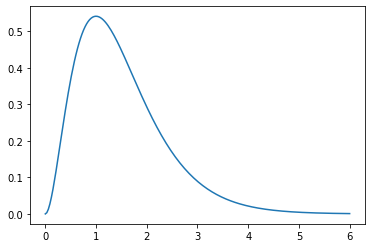

In [4]:
xmin = 0.0
xmax = 6.0
xv = np.linspace(xmin, xmax, 200)
fx = np.zeros(len(xv),float) # define column vector
for i in range(len(xv)):
    fx[i] = f1(xv[i])[0]

fig, ax = plt.subplots()
ax.plot(xv, fx)
plt.show()

### Newton’s Method

In order to implement the Newton method we basically look for the root of a first derivative so that $f'(x)=0$.

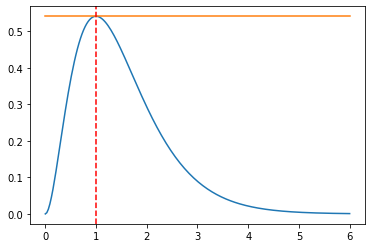

In [5]:
myOpt = 1.0
fmaxval = f1simple(myOpt)

xmin = 0.0
xmax = 6.0
xv = np.linspace(xmin, xmax, 200)
fx = np.zeros(len(xv),float) # define column vector
for i in range(len(xv)):
    fx[i] = f1(xv[i])[0]

fig, ax = plt.subplots()
ax.plot(xv, fx)
ax.plot(xv, fmaxval*np.ones(len(xv)))
ax.axvline(x = myOpt, ymin=0.0, color='r', linestyle='--')
plt.show()

We then use an adjustment of the Newthon-Raphson Root Finding Algorithm to find this point. 

Newthon-Raphson Root Finding Algorithm:

$$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$$

We have to adjust this of course because the function we search the foot for is already the first derivative of a function, so that we have:

$$x_{n+1}=x_n-\frac{f'(x_n)}{f''(x_n)}$$

In [6]:
def newton(f3, x0, tol = 1e-9, nmax = 100):
    # Newton's method for optimization, starting at x0
    # f3 is a function that given x returns the vector
    # (f(x), f'(x), f''(x)), for some f
    x = x0
    f3x = f3(x)
    n = 0
    while ((abs(f3x[1]) > tol) and (n < nmax)):
        x = x - f3x[1]/f3x[2]
        f3x = f3(x)
        n = n + 1
    if (n == nmax):
        print("newton failed to converge")
    else:
        return(x)

We use these algorithms to find the maximum point of our function `f1`. Note that if we use the Newton algorithm we will need the first and second derivatives of the functions. This is why we use function f1 that returns f, f' and f'' via an array/vector as return value.

In [7]:
print(" -----------------------------------")
print(" Newton results ")
print(" -----------------------------------")
print(newton(f1, 0.25))
print(newton(f1, 0.5))
print(newton(f1, 0.75))
print(newton(f1, 1.75))

 -----------------------------------
 Newton results 
 -----------------------------------
-1.25
1.0
0.9999999999980214
14.42367881581733


Derivatives are oft hard to compute; therefore a numerical method that does not require the derivative is preferable. An example is bisection in the golden ratio (homework problem 10).


### Bisection in the golden-section

The golden-section method works in one dimension only, but does not need the derivatives of the function. However, the function still needs to be continuous. In order to determine whether there is a local maximum we need three points. Then we can use the following:

If $x_l<x_m<x_r$ and 
1. $f(x_l)\le f(x_m)$ and 
2. $f(x_r)\le f(x_m)$ then there must be a local maximum in the interval between $[x_l,x_r]$

This method is very similar to the bisection method (root bracketing).

The method starts with three starting values and operates by successively narrowing the range of values on the specified interval, which makes it relatively slow, but very robust. The technique derives its name from the fact that the algorithm maintains the function values for four points whose three interval widths are in the ratio

$$2-\varphi :2 \times \varphi -3 : 2 - \varphi$$

where $\varphi$ (phi) is the [golden ratio](https://en.wikipedia.org/wiki/Golden_ratio).

In mathematics, two quantities $a$ and $b$ are in the golden ratio if their ratio is the same as the ratio of their sum to the larger of the two quantities. Assume $a>b$ then the ratio:

$$\frac{a}{b}=\frac{a+b}{a}=\varphi$$

Note: $a+b$ is to $a$ as $a$ is to $b$.
![Line segments in the golden ratio](https://upload.wikimedia.org/wikipedia/commons/a/a6/Golden_ratio_line.png "Line segments in the golden ratio")

The golden ratio is the solution of the quadratic equation:

$$\varphi^2 - \varphi - 1 = 0$$

so that 

$$\varphi = \frac{1\pm\sqrt{5}}{2}=[1.6180339887, -0.6180339887]$$

#### Algorithm

1. if $x_r-x_l\le \epsilon$ then stop
2. if $x_r-x_m>x_m-x_l$ then do (a) otherwise do (b)

    a. Let $y=x_m+(x_r-x_m)/(1+\varphi)$; if $f(y)\ge f(x_m)$ then put $x_l=x_m$ and $x_m = y$; otherwise put $x_r=y$
    
    b. Let $y=x_m+(x_m-x_l)/(1+\varphi)$; if $f(y)\ge f(x_m)$ then put $x_r=x_m$ and $x_m = y$; otherwise put $x_l=y$
    
3. go back to step 1.


In [8]:
def gsection(ftn, xl, xm, xr, tol = 1e-9):
    # applies the golden-section algorithm to maximise ftn
    # we assume that ftn is a function of a single variable
    # and that x.l < x.m < x.r and ftn(x.l), ftn(x.r) <= ftn(x.m)
    #
    # the algorithm iteratively refines x.l, x.r, and x.m and
    # terminates when x.r - x.l <= tol, then returns x.m
    # golden ratio plus one
    gr1 = 1 + (1 + np.sqrt(5))/2
    #
    # successively refine x.l, x.r, and x.m
    fl = ftn(xl)
    fr = ftn(xr)
    fm = ftn(xm)
    while ((xr - xl) > tol):
        if ((xr - xm) > (xm - xl)):
            y = xm + (xr - xm)/gr1
            fy = ftn(y)
            if (fy >= fm):
                xl = xm
                fl = fm
                xm = y
                fm = fy
            else:
                xr = y
                fr = fy
        else:
            y = xm - (xm - xl)/gr1
            fy = ftn(y)
            if (fy >= fm):
                xr = xm
                fr = fm
                xm = y
                fm = fy
            else:
                xl = y
                fl = fy
    return(xm)

We next use this algorithms to find the maximum point of our function `f1simple`. The Golden section algorithm does not require the derivates of the function, so we just call the `f1simple` function that only returns the functional value.

In [9]:
print(" -----------------------------------")
print(" Golden section results ")
print(" -----------------------------------")
myOpt = gsection(f1simple, 0.1, 0.25, 1.3)
print(gsection(f1simple, 0.1, 0.25, 1.3))
print(gsection(f1simple, 0.25, 0.5, 1.7))
print(gsection(f1simple, 0.6, 0.75, 1.8))
print(gsection(f1simple, 0.0, 2.75, 5.0))

 -----------------------------------
 Golden section results 
 -----------------------------------
1.0000000117853984
1.0000000107340477
0.9999999921384167
1.0000000052246139


We can also use a built in function minimizer. The built in function `fmin` is in the `scipy.optimize` library. We need to import it first. So if we want to maximize our function we have to define it as a negated function, that is:

$$g(x)=-f(x)$$

then

$$\min g(x)$$

is the same as 

$$\max f(x)$$

Since we want to find the maximum of the function, we need to “trick” the minimization algorithm. We therefore need to redefine the function as

In [10]:
def f1simpleNeg(x):
    # gamma(2,3) density
    if (x < 0):
        return (0)
    if (x == 0):
        return (np.nan)
    y = np.exp(-2*x)
    return (-(4 * x**2 * y))

Here we simply return negative values of this function. If we now minimize this function, we actually maximize the original function

$$f(x)=4x^2e^{-2x}$$

In [11]:
print(" -----------------------------------")
print(" fmin results ")
print(" -----------------------------------")
print(fmin(f1simpleNeg, 0.25))
print(fmin(f1simpleNeg, 0.5))
print(fmin(f1simpleNeg, 0.75))
print(fmin(f1simpleNeg, 1.75))

 -----------------------------------
 fmin results 
 -----------------------------------
Optimization terminated successfully.
         Current function value: -0.541341
         Iterations: 18
         Function evaluations: 36
[1.]
Optimization terminated successfully.
         Current function value: -0.541341
         Iterations: 16
         Function evaluations: 32
[1.]
Optimization terminated successfully.
         Current function value: -0.541341
         Iterations: 14
         Function evaluations: 28
[0.99997559]
Optimization terminated successfully.
         Current function value: -0.541341
         Iterations: 16
         Function evaluations: 32
[1.00001221]


## Multivariate Optimization

# Function

Here we want to optimize the following function `f3`

In [12]:
def f3simple(x):
    a = x[0]**2/2.0 - x[1]**2/4.0
    b = 2*x[0] - np.exp(x[1])
    f = np.sin(a)*np.cos(b)
    return(f)

Its negative version:

In [13]:
def f3simpleNeg(x):
    a = x[0]**2/2.0 - x[1]**2/4.0
    b = 2*x[0] - np.exp(x[1])
    f = -np.sin(a)*np.cos(b)
    return(f)

And the version that returns $f(x)$, $f'(x)$ (i.e., the gradient), and $f''(x)$ (i.e., the Hessian matrix):

In [14]:
def f3(x):
    a = x[0]**2/2.0 - x[1]**2/4.0
    b = 2*x[0] - np.exp(x[1])
    f = np.sin(a)*np.cos(b)
    f1 = np.cos(a)*np.cos(b)*x[0] - np.sin(a)*np.sin(b)*2
    f2 = -np.cos(a)*np.cos(b)*x[1]/2 + np.sin(a)*np.sin(b)*np.exp(x[1])
    f11 = -np.sin(a)*np.cos(b)*(4 + x[0]**2) + np.cos(a)*np.cos(b) \
        - np.cos(a)*np.sin(b)*4*x[0]
    f12 = np.sin(a)*np.cos(b)*(x[0]*x[1]/2.0 + 2*np.exp(x[1])) \
        + np.cos(a)*np.sin(b)*(x[0]*np.exp(x[1]) + x[1])
    f22 = -np.sin(a)*np.cos(b)*(x[1]**2/4.0 + np.exp(2*x[1])) \
        - np.cos(a)*np.cos(b)/2.0 - np.cos(a)*np.sin(b)*x[1]*np.exp(x[1]) \
        + np.sin(a)*np.sin(b)*np.exp(x[1])
    # Function f3 returns: f(x), f'(x), and f''(x)
    return (f, np.array([f1, f2]), np.array([[f11, f12], [f12, f22]]))

We next plot the function:

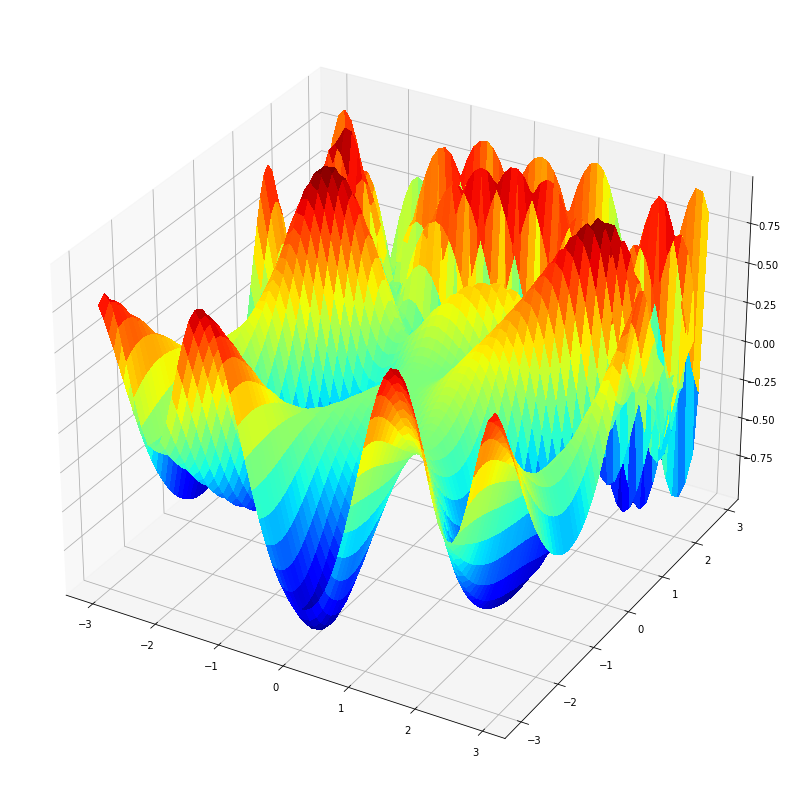

In [15]:
fig = plt.figure(figsize=(14, 16))
ax = plt.gca(projection='3d')

X = np.arange(-3, 3, .1)
Y = np.arange(-3, 3, .1)
X, Y = np.meshgrid(X, Y)

Z = np.zeros((len(X),len(Y)),float)
for i in range(len(X)):
    for j in range(len(Y)):
        Z[i][j] = f3simple([X[i][j],Y[i][j]])

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, \
    cmap=plt.cm.jet, linewidth=0, antialiased=False)
plt.show()

### Multivariate Newton Method

In [16]:
def newtonMult(f3, x0, tol = 1e-9, nmax = 100):
    # Newton's method for optimisation, starting at x0
    # f3 is a function that given x returns the list
    # {f(x), grad f(x), Hessian f(x)}, for some f
    x = x0
    f3x = f3(x)
    n = 0
    while ((max(abs(f3x[1])) > tol) and (n < nmax)):
        x = x - np.linalg.solve(f3x[2], f3x[1])
        f3x = f3(x)
        n = n + 1
    if (n == nmax):
        print("newton failed to converge")
    else:
        return(x)

Compare the Newton method with the built in `fmin` method in `scipy.optimize`. We use various starting values to see whether we can find more than one optimum.

In [17]:
for x0 in np.arange(1.4, 1.6, 0.1):
    for y0 in np.arange(0.4, 0.7, 0.1):
        # This algorithm requires f(x), f'(x), and f''(x)
        print("Newton: f3  " + str([x0,y0]) + ' --> ' + str(newtonMult(f3, \
            np. array([x0,y0]))))

        print("fmin: f3 " + str([x0,y0]) + ' --> ' \
            + str(fmin(f3simpleNeg, np.array([x0,y0]))))

        print(" ----------------------------------------- ")

Newton: f3  [1.4, 0.4] --> [ 0.04074437 -2.50729047]
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 47
         Function evaluations: 89
fmin: f3 [1.4, 0.4] --> [2.0307334  1.40155445]
 ----------------------------------------- 
Newton: f3  [1.4, 0.5] --> [0.11797341 3.34466147]
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 50
         Function evaluations: 93
fmin: f3 [1.4, 0.5] --> [2.03072555 1.40154756]
 ----------------------------------------- 
Newton: f3  [1.4, 0.6] --> [-1.5531627  6.0200129]
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 43
         Function evaluations: 82
fmin: f3 [1.4, 0.6] --> [2.03068816 1.40151998]
 ----------------------------------------- 
Newton: f3  [1.5, 0.4] --> [2.83714224 5.35398196]
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations:

## Homework 10

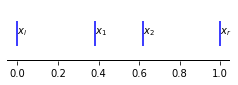

In [18]:
xl = 0;
xr = 1;
l = (-1 + np.sqrt(5))/2;
x1 = l*xl + (1-l)*xr;
x2 = (1-l)*xl + l*xr;

a = [xl,x1,x2,xr]

fig1 = plt.figure(facecolor='white',figsize=(4,1))
ax1 = plt.axes(frameon=False)
ax1.get_xaxis().tick_bottom()
ax1.axes.get_yaxis().set_visible(False)
ax1.eventplot(a, orientation='horizontal', colors='b')
ax1.annotate('$x_l$', (xl,1))
ax1.annotate('$x_r$', (xr,1))
ax1.annotate('$x_1$', (x1,1))
ax1.annotate('$x_2$', (x2,1))
xmin, xmax = ax1.get_xaxis().get_view_interval()
ymin, ymax = ax1.get_yaxis().get_view_interval()
ax1.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))
plt.show()

In [19]:
def goldsectmin(f, xl, xr, tol = 1e-9, nmax = 100):
    # GOLDSECTMIN finds a minimum of the function f 
    # in the interval [xl, xr] using the golden section method
    
    l = (-1 + np.sqrt(5))/2;
    x1 = l*xl + (1-l)*xr;
    x2 = (1-l)*xl + l*xr;
    f1 = f(x1);
    f2 = f(x2);
    n = 0;
    while ((abs(xr - xl) > tol) and (n < nmax)):
        if (f1 > f2):
            xl = x1;
            x1 = x2;
            f1 = f2;
            x2 = (1-l)*xl + l*xr;
            f2 = f(x2);
        else:
            xr = x2;
            x2 = x1;
            f2 = f1;
            x1 = l*xl + (1-l)*xr;
            f1 = f(x1);
    if (n == nmax):
        print("GOLDSECTMIN failed to converge")
    else:
        return(x1)

Angenommen, jeder Mensch hat eine feste Zahl von Herzschlaegen in seinem Leben zur Verfuegung. Sei $x$ der Anteil der Zeit, die der Mensch mit sportlichen Aktivitaeten verbringt. Beim Sport schlage das Herz mit 120 Schlaegen pro Minute, im Ruhezustand mit $g(x)$ Schlaegen pro Minute, wobei fuer untrainierte Personen $g(0)=80$, und $g(x)$ faellt fuer groessere $x$ schnell auf 50 ab, z.B.

In [20]:
g = lambda x : 50 + 30*np.exp(-100*x)

Die durchschnittliche Zahl der Herzschlaege pro Minute wird geplottet. Finde die optimale Dauer der sportlichen Betaetigung pro Tag, d.h. finde das Minimum von $f(x)$.

Das entspricht 53.71458937808303 Minuten Sport pro Tag.


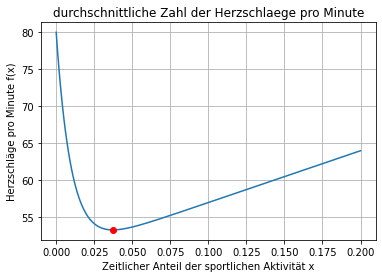

In [21]:
f = lambda x : 120*x + np.multiply(g(x),(1 - x))

xmin = 0.0
xmax = 0.2
xv = np.linspace(xmin, xmax, 200)

fig, ax = plt.subplots()
ax.plot(xv, f(xv))

ax.set(xlabel='Zeitlicher Anteil der sportlichen Aktivität x', ylabel='Herzschläge pro Minute f(x)',
       title='durchschnittliche Zahl der Herzschlaege pro Minute')
ax.grid()

# Bisektion mit goldenem Schnitt -> goldsectmin.m
x = goldsectmin(f, xl, xr, 1e-6);
print('Das entspricht {} Minuten Sport pro Tag.'.format(x*24*60));
ax.plot(x, f(x), 'ro');

plt.show()

## Multi-dimensional optimisation without constraints

*Dimensionality of the problem:* The scale of an optimization problem is pretty much set by the dimensionality of the problem, i.e. the number of scalar variables on which the search is performed.

$$z=f(x_1,x_2,\dots x_n)$$

We want to find a (local) minimum $x_0$ of a function $f:\mathbf{R}^n \to \mathbf{R}^n$. If $f$ is twice differentiable then a necessary and sufficient condition is

$$\nabla f(x_0) = 0, \qquad x^T H(x_0) x >0\;\forall\; x\in\mathbf{R}^n\setminus\{ 0\}$$

where $H$ is the Hessian of $f$. Again, computing the gradient and solving the corresponding nonlinear system of equations can be difficult. Fortunately there are methods that do not require the gradient.

As an example, consider:

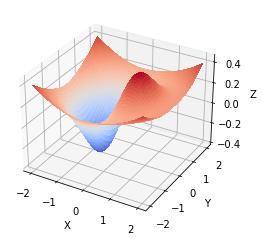

In [22]:
fig = plt.figure()
ax = fig.gca(projection='3d')

f = lambda x,y : np.multiply(x,
                             np.exp(- np.square(x) - np.square(y))
                            ) + (np.square(x) + np.square(y))/20

# Make data.
X = np.linspace(-2, 2, 50)
Y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the axis.
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


We first rewrite this as a function of a two-dimensional vector:

In [23]:
F = lambda x : f(x[0], x[1])

We choose an initial guess $x_0$ and set some options that we pass to the Python function `minimize` (unconstrained minimisation), which is part of SciPy.

Some of the `scipy.optimize` routines allow for a callback function. Below is an example using the "nelder-mead" routine where I use a callback function to display the current value of the arguments and the value of the objective function at each iteration.

In the example below, the minimize routine is used with the Nelder-Mead simplex algorithm (selected through the method parameter):

In [24]:
from scipy.optimize import minimize

Nfeval = 1

def callbackF(Xi):
    global Nfeval
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}'.format(Nfeval, Xi[0], Xi[1], F(Xi)))
    Nfeval += 1

print('{0:4s}   {1:9s}   {2:9s}   {3:9s}'.format('Iter', ' X1', ' X2', 'F(X)'))  
x0 = np.array([-.5, 0]);
res = minimize(F, 
               x0, 
               callback=callbackF,
               method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})
res.x

Iter    X1          X2         F(X)     
   1   -0.525000    0.000000   -0.384745
   2   -0.575000   -0.000375   -0.396592
   3   -0.600000   -0.000063   -0.400606
   4   -0.650000   -0.000438   -0.404889
   5   -0.675000   -0.000125   -0.405204
   6   -0.675000   -0.000125   -0.405204
   7   -0.675000   -0.000125   -0.405204
   8   -0.663281   -0.000334   -0.405205
   9   -0.664648   -0.000176   -0.405218
  10   -0.669482   -0.000190   -0.405237
  11   -0.669482   -0.000190   -0.405237
  12   -0.669482   -0.000190   -0.405237
  13   -0.669482   -0.000190   -0.405237
  14   -0.669482   -0.000190   -0.405237
  15   -0.669025   -0.000145   -0.405237
  16   -0.669025   -0.000145   -0.405237
  17   -0.669025   -0.000145   -0.405237
  18   -0.669025   -0.000145   -0.405237
  19   -0.669025   -0.000145   -0.405237
  20   -0.669025   -0.000145   -0.405237
  21   -0.669036   -0.000041   -0.405237
  22   -0.669036   -0.000041   -0.405237
  23   -0.669099   -0.000006   -0.405237
  24   -0.669058

array([-6.69071823e-01,  4.53270844e-09])

The simplex algorithm is probably the simplest way to minimize a fairly well-behaved function. It requires only function evaluations and is a good choice for simple minimization problems. However, because it does not use any gradient evaluations, it may take longer to find the minimum.

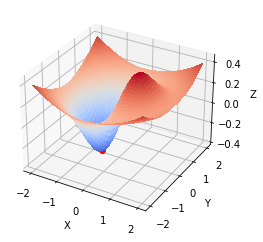

In [25]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.linspace(-2, 2, 50)
Y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

opt = ax.plot3D(res.x[0],res.x[1],F(res.x),'ro')

# Customize the axis.
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## Multi-dimensional optimisation with constraints

Let's first look at a linear example.

A company has two operation sites $O_1$ and $O_2$ and has to transport material to two construction sites $C_1$ and $C_2$.

- There are 8 lorries at $O_1$ and 6 lorries at $O_2$.
- Construction site $C_1$ requires 4 loads a day, $C_2$ requires 7 loads.
- The distances are $O_1-C_1=8$km, $O_1-C_2=9$km, $O_2-C_1=3$km, $O_2-C_2=5$km.

The task is to minimise the total distance travelled per day by all the lorries.

Let $x_1$ be the number of lorries driving each day from $O_1$ to $C_1$, $x_2:O_1-C_2$, $x_3:O_2-C_1$, $x_4:O_2-C_2$. Then the function to be minimised is

$$f:\mathbf{R}^4\to \mathbf{R}, \quad f(x) = 8 x_1 + 9 x_2 + 3 x_3 + 5 x_4$$

and the constraints are

$$x_1 + x_2 \leq 8,\\
x_3 + x_4 \leq 6,\\
x_1 + x_3 = 4,\\
x_2 + x_4 = 7,\\
x_1,x_2,x_3,x_4 \geq 0.$$

We see that the constraints come in three types:

- inequalities
- equalities
- lower (or upper) bounds on the unknowns

This problem can actually be solved analytically without too much effort. First we eliminate $x_3$ and $x_4$:

$$x_3 = 4 - x_1, \quad x_4 = 7 - x_2$$

The modified target function is

$$\tilde f (x_1, x_2) = 5 x_1 + 4 x_2 + 47$$

and the constraints read

$$x_1 + x_2 \leq 8, \quad x_1 + x_2 \geq 5, \quad x_1 \leq 4, \quad x_2 \leq 7, \quad x_1 \geq 0, \quad x_2 \geq 0.$$

The allowed region in the  plane looks like this:

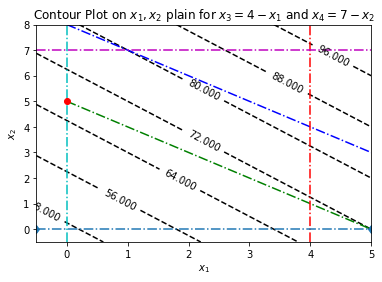

In [26]:
plt.figure()

xmin = -0.5
xmax = 5.0
ymin = -0.5
ymax = 8.0



plt.plot([0, 5], [8, 3], 'b-.')  #x1 + x2 <= 8
plt.plot([0, 5], [5, 0], 'g-.')  #x1 + x2 >= 5
plt.plot([4, 4], [ymin, ymax], 'r-.')  #x1 <= 4
plt.plot([xmin, xmax], [7, 7], 'm-.')  #x2 <= 7
plt.plot([0, 0], [ymin, ymax], 'c-.')  #x1 => 0
plt.plot([xmin, xmax], [0, 0], 'd-.')  #x2 => 0

plt.plot(0,5,'ro')   #min


xlist = np.linspace(xmin, xmax, 5)
ylist = np.linspace(ymin, ymax, 8)
X, Y = np.meshgrid(xlist, ylist)

# Now we add the contour lines of the target function
ftilde = lambda x1,x2 : 5*x1 + 4*x2 + 47
Z = ftilde(X, Y)
#print(Z)

cp = plt.contour(X, Y, Z, colors='black', linestyles='dashed')
plt.clabel(cp, inline=True, fontsize=10)
plt.title('Contour Plot on $x_1,x_2$ plain for $x_3=4-x_1$ and $x_4=7-x_2$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

From this plot it is obvious that the point with the lowest value of $\tilde f$ is $x_1 = 0, \; x_2=5$, which implies $x_3 = 4, \; x_4 = 2$.

Now we will solve this problem using Python. The objective function is

In [27]:
f = lambda x : 8*x[0] + 9*x[1] + 3*x[2] + 5*x[3]

### Defining linear Constraints

The linear constraint $x_1 + x_2 \leq 8$, $x_3 + x_4 \leq 6$, $x_1 + x_3 = 4$, $x_2 + x_4 = 7$ has the general inequality form

$$l_b\le Ax\le u_b$$

where the vectors for lower bound $l_b$, upper bound $u_b$, and the independent variables $x$ is passed as ndarray of shape
(n,) and the matrix $A$ has shape (m, n).

It is possible to use equal bounds to represent an equality constraint or infinite bounds to represent a one-sided constraint.

and can be written in the linear constraint standard format:

In [28]:
from scipy.optimize import LinearConstraint
A = [[1, 1, 0, 0], [0, 0, 1, 1], [1, 0, 1, 0], [0, 1, 0, 1]]
lb = [-np.inf, -np.inf, 4, 7]
ub = [8, 6, 4, 7]
linear_constraint = LinearConstraint(A,lb,ub)

The bound constraints of the independent variables $x_1,x_2,x_3,x_4 \geq 0$ are defined using a Bounds object.

In [29]:
from scipy.optimize import Bounds
lb = [0, 0, 0, 0]
ub = [np.inf, np.inf, np.inf, np.inf]
bounds = Bounds(lb, ub)

Finally, we specify an initial vector:

In [30]:
x0 = [1, 1, 1, 1]

The method 'trust-constr' requires the constraints to be defined as a sequence of objects `LinearConstraint` and `NonlinearConstraint`. The implementation is based on [EQSQP] for equality-constraint problems and on [TRIP] for problems with inequality constraints. Both are trust-region type algorithms suitable for large-scale problems.

In [31]:
Nfeval = 1

def callbackF(Xi,_):
    global Nfeval
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}   {4: 3.6f}   {5: 3.6f}'.format(Nfeval, Xi[0], Xi[1], Xi[2], Xi[3], f(Xi)))
    Nfeval += 1

print('{0:4s}   {1:9s}   {2:9s}   {3:9s}   {4:9s}   {5:9s}'.format('Iter', ' X1', ' X2', ' X3', ' X4', 'f(X)'))  

res = minimize(f, x0, method='trust-constr',
               callback=callbackF,
               constraints=linear_constraint,
               options={'verbose': 1}, 
               bounds=bounds)
print(res.x)

Iter    X1          X2          X3          X4         f(X)     
   1    1.000000    1.000000    1.000000    1.000000    25.000000
   2    0.862118    1.153777    1.409007    1.597916    29.497543
   3    0.276923    1.274560    2.850189    3.580524    40.139611
   4   -0.002468    4.886790    3.971294    2.035743    66.053964
   5   -0.002468    4.886790    3.971294    2.035743    66.053964
   6    0.003035    5.000708    3.996965    1.999292    67.018006
   7    0.003035    5.000708    3.996965    1.999292    67.018006
   8    0.003232    4.997751    3.996768    2.002249    67.007161
   9    0.003232    4.997751    3.996768    2.002249    67.007161
  10    0.001089    4.999055    3.998911    2.000945    67.001664
  11    0.001089    4.999055    3.998911    2.000945    67.001664
  12    0.000081    5.000004    3.999919    1.999996    67.000418
  13    0.000160    4.999880    3.999840    2.000120    67.000320
`gtol` termination condition is satisfied.
Number of iterations: 13, function

## Multi-dimensional optimisation with nonlinear constraints

We want to minimise the function

In [32]:
f = lambda x,y : np.multiply(x,
                             np.exp(- np.square(x) - np.square(y))
                            ) + (np.square(x) + np.square(y))/20
F = lambda x : f(x[0], x[1])

### Defining Nonlinear Constraints 

Lets assume we have the constraints $x_0^2 + x_1 \le 1$ and $x_0^2 - x_1 \le 1$. We can write this in vector form.

The nonlinear constraint:

$$c(x) = \left[ \begin{matrix} x_0^2 + x_1 \\ x_0^2 - x_1 \end{matrix} \right] \le \left[ \begin{matrix} 1 \\ 1 \end{matrix} \right]$$

with Jacobian matrix:

$$J(x) = \left[ \begin{matrix} 2x_0 & 1 \\ 2x_0 & -1 \end{matrix} \right]$$

and linear combination of the Hessians:

$$H(x,v)=\sum_{i=0}^{1}v_i \nabla^2 c_i(x)=v_0 \left[ \begin{matrix} 2 & 0 \\ 2 & 0 \end{matrix} \right] + v_1 \left[ \begin{matrix} 2 & 0 \\ 2 & 0 \end{matrix} \right]$$

The nonlinear constraint can be defined using a NonlinearConstraint object:

In [33]:
from scipy.optimize import NonlinearConstraint
def cons_f(x):return [x[0]**2 + x[1], x[0]**2 - x[1]]
def cons_J(x):return [[2*x[0], 1], [2*x[0], -1]]
def cons_H(x, v):return v[0]*np.array([[2, 0], [0, 0]]) + v[1]*np.array([[2, 0], [0, 0]])
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess=cons_H)

Alternatively, it is also possible to define the Hessian $H(x,v)$
 as a sparse matrix:

In [34]:
from scipy.sparse import csc_matrix
def cons_H_sparse(x, v):return v[0]*csc_matrix([[2, 0], [0, 0]]) + v[1]*csc_matrix([[2, 0], [0, 0]])
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1,
                                           jac=cons_J, hess=cons_H_sparse)

or as a LinearOperator object.

In [35]:
from scipy.sparse.linalg import LinearOperator
def cons_H_linear_operator(x, v):
    def matvec(p):
        return np.array([p[0]*2*(v[0]+v[1]), 0])
    return LinearOperator((2, 2), matvec=matvec)
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1,
                                           jac=cons_J, 
                                           hess=cons_H_linear_operator)

When the evaluation of the Hessian $H(x,v)$ is difficult to implement or computationally infeasible, one may use HessianUpdateStrategy. Currently available strategies are BFGS and SR1.

In [36]:
from scipy.optimize import BFGS
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess=BFGS())

Alternatively, the Hessian may be approximated using finite differences.

In [37]:
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess='2-point')

The Jacobian of the constraints can be approximated by finite differences as well. In this case, however, the Hessian cannot be computed with finite differences and needs to be provided by the user or defined using HessianUpdateStrategy.

In [38]:
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac='2-point', hess=BFGS())

Iter    X1          X2         F(X)     
   1   -4.000000    1.000000    0.850000
   2   -3.652293    1.075655    0.724812
   3   -3.652293    1.075655    0.724812
   4   -3.257139    0.909257    0.571750
   5   -1.944555    0.583613    0.174567
   6   -0.699082    1.301712    0.030383
   7   -0.951355    0.867497   -0.098438
   8   -1.393800    0.231787   -0.089490
   9   -1.097885    0.573608   -0.159974
  10   -1.074535    0.621404   -0.153145
  11   -1.074535    0.621404   -0.153145
  12   -0.998924    0.515731   -0.219075
  13   -0.998924    0.515731   -0.219075
  14   -0.978027    0.474875   -0.240811
  15   -0.978027    0.474875   -0.240811
  16   -0.973442    0.470234   -0.244079
  17   -0.973442    0.470234   -0.244079
  18   -0.973011    0.468749   -0.244733
  19   -0.973011    0.468749   -0.244733
  20   -0.972769    0.468636   -0.244861
  21   -0.972769    0.468636   -0.244861
  22   -0.972750    0.468580   -0.244887
  23   -0.972750    0.468580   -0.244887
  24   -0.972744

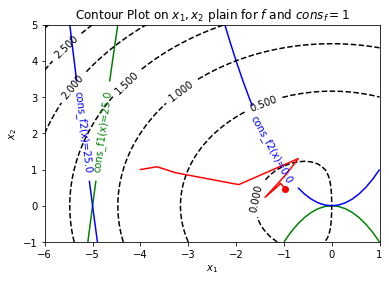

In [56]:
Nfeval = 1
trace = np.array([])

def callbackF(Xi,_):
    global Nfeval
    global trace
    trace=np.append(trace,Xi)
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}'.format(Nfeval, Xi[0], Xi[1], F(Xi)))
    Nfeval += 1

print('{0:4s}   {1:9s}   {2:9s}   {3:9s}'.format('Iter', ' X1', ' X2', 'F(X)'))  
x0 = np.array([-4, 1]);
res = minimize(F, 
               x0, 
               callback=callbackF,
               constraints=nonlinear_constraint,
               method='trust-constr',
               options={'verbose': 1}
              )
res.x

plt.figure()

xmin = -6.0
xmax = 1.0
ymin = -1.0
ymax = 5.0

line = trace.reshape((int(trace.size/2),2))
plt.plot(line[:,0],line[:,1],'r-')
plt.plot(res.x[0],res.x[1],'ro')   #min

xlist = np.linspace(xmin, xmax, 50)
ylist = np.linspace(ymin, ymax, 50)
X, Y = np.meshgrid(xlist, ylist)

cpg1 = plt.contour(X, Y, cons_f([X,Y])[0], 1,colors='green')
plt.clabel(cpg1, inline=True, fmt='cons_f1(x)=%r',fontsize=10)

cpg2 = plt.contour(X, Y, cons_f([X,Y])[1], 1,colors='blue')
plt.clabel(cpg2, inline=True, fmt='cons_f2(x)=%r',fontsize=10)

cpf = plt.contour(X, Y, f(X, Y), colors='black', linestyles='dashed')
plt.clabel(cpf, inline=True, fontsize=10)
plt.title('Contour Plot on $x_1,x_2$ plain for $f$ and $cons_f=1$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

Lets considder the nonliner constraint $g(x,y)\leq 0$ with $G(x)=\frac{x_1x_2}{2}+(x_1-2)^2+\frac{(x_2-2)^2}{2}-2$

In [42]:
g = lambda x,y : np.multiply(x,y)/2 + np.square(x+2) + np.square(y-2)/2 - 2
G = lambda x : g(x[0], x[1])
nonlinear_constraint = NonlinearConstraint(G, -np.inf, 0, jac='2-point', hess=BFGS())
# nonlinear_constraint = NonlinearConstraint(G, -np.inf, 0, jac=cons_J, hess='2-point')

We specify an initial vector and solve the optimization problem.

Iter    X1          X2         F(X)     
   1   -2.000000    1.000000    0.236524
   2   -1.871324    0.995449    0.203699
   3   -1.350529    1.034619    0.069988
   4   -1.117027    0.809509   -0.071410
   5   -1.117027    0.809509   -0.071410
   6   -1.037453    0.493526   -0.211180
   7   -1.028618    0.523244   -0.204954
   8   -0.991809    0.504714   -0.225546
   9   -0.991809    0.504714   -0.225546
  10   -0.983618    0.468088   -0.240923
  11   -0.976806    0.476008   -0.240895
  12   -0.976806    0.476008   -0.240895
  13   -0.973667    0.469965   -0.244083
  14   -0.973667    0.469965   -0.244083
  15   -0.972929    0.468843   -0.244733
  16   -0.972929    0.468843   -0.244733
  17   -0.972780    0.468624   -0.244861
  18   -0.972780    0.468624   -0.244861
  19   -0.972750    0.468580   -0.244887
`gtol` termination condition is satisfied.
Number of iterations: 19, function evaluations: 42, CG iterations: 19, optimality: 4.39e-09, constraint violation: 0.00e+00, execution ti

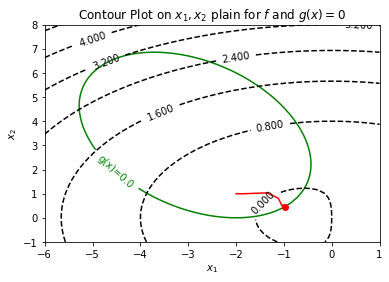

In [43]:
Nfeval = 1
trace = np.array([])

def callbackF(Xi,_):
    global Nfeval
    global trace
    trace=np.append(trace,Xi)
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}'.format(Nfeval, Xi[0], Xi[1], F(Xi)))
    Nfeval += 1

print('{0:4s}   {1:9s}   {2:9s}   {3:9s}'.format('Iter', ' X1', ' X2', 'F(X)'))  
x0 = np.array([-2, 1]);
res = minimize(F, 
               x0, 
               callback=callbackF,
               constraints=nonlinear_constraint,
               method='trust-constr',
               options={'verbose': 1}
              )
res.x

plt.figure()

xmin = -6.0
xmax = 1.0
ymin = -1.0
ymax = 8.0

line = trace.reshape((int(trace.size/2),2))
plt.plot(line[:,0],line[:,1],'r-')
plt.plot(res.x[0],res.x[1],'ro')   #min

xlist = np.linspace(xmin, xmax, 50)
ylist = np.linspace(ymin, ymax, 50)
X, Y = np.meshgrid(xlist, ylist)

cpg = plt.contour(X, Y, g(X, Y), 0,colors='green')
plt.clabel(cpg, inline=True, fmt='g(x)=%r',fontsize=10)

cpf = plt.contour(X, Y, f(X, Y), colors='black', linestyles='dashed')
plt.clabel(cpf, inline=True, fontsize=10)
plt.title('Contour Plot on $x_1,x_2$ plain for $f$ and $g(x)=0$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()